# Part 1 – Pick your Scenario

## Scenario 2 – Used Cars

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# Part 2 – Split and Store your data

In [3]:
df.shape

(426880, 26)

In [4]:
# Create a sample of the data of size 100 using stratified sampling
df_sample = df.sample(n=100, random_state=42)

# Removing the selected sample from the original data
df = df[~df.index.isin(df_sample.index)]

# Removing the selected sample from the original data
df = df[~df.index.isin(df_sample.index)]

print(df.shape)
print(df_sample.shape)


(426780, 26)
(100, 26)


In [5]:
host = r'127.0.0.1' 
db = r'MSDS610'
user = r'postgres' 
pw = r'8751' 
port = r'5432' 
schema = r'raw' 

from sqlalchemy import create_engine

engine = create_engine(f'postgresql://{user}:{pw}@{host}:{port}/{db}')

# Create a table in the database
df_sample.to_sql('vehicles', engine, schema=schema, if_exists='replace', index=False)

100

# This is the sample data inserted in the raw schema.

![Local Image](Sample_Data.png)


# Part 3 –Data Definition and Analytical Question

### Data Definition
The dataset contains listings of cars and trucks from Craigslist, including various attributes related to vehicle specifications, pricing, and listing details. Below is the breakdown of the key fields:

| Field Name         | Description | Data Type |
|--------------------|-------------|------------|
| `id`              | Unique identifier for the listing | Nominal |
| `url`             | URL of the Craigslist listing | Nominal |
| `region`          | Geographic location of the listing | Nominal |
| `region_url`      | URL to the Craigslist region page | Nominal |
| `price`           | Listed price of the vehicle in USD | Continuous |
| `year`            | Year of manufacture | Ordinal |
| `manufacturer`    | Name of the vehicle manufacturer (e.g., Toyota, Ford) | Nominal |
| `model`          | Model name of the vehicle | Nominal |
| `condition`       | Stated condition of the vehicle (e.g., excellent, good, fair) | Ordinal |
| `cylinders`       | Number of engine cylinders (e.g., 4 cylinders, 6 cylinders) | Ordinal |
| `fuel`           | Type of fuel used (e.g., gasoline, diesel, electric) | Nominal |
| `odometer`        | Mileage of the vehicle (miles driven) | Continuous |
| `title_status`    | Legal status of the vehicle title (e.g., clean, salvage) | Nominal |
| `transmission`    | Type of transmission (e.g., automatic, manual) | Nominal |
| `VIN`            | Vehicle Identification Number | Nominal |
| `drive`          | Type of drivetrain (e.g., 4WD, FWD, RWD) | Nominal |
| `size`           | General size category of the vehicle (e.g., compact, full-size) | Nominal |
| `type`           | Vehicle type (e.g., SUV, sedan, truck) | Nominal |
| `paint_color`     | Color of the vehicle | Nominal |
| `image_url`       | URL of the listing image | Nominal |
| `description`     | Free-text description of the listing | Nominal |
| `county`         | County of the listing (mostly empty) | Nominal |
| `state`          | State where the vehicle is listed | Nominal |
| `lat`            | Latitude coordinate of the listing location | Continuous |
| `long`           | Longitude coordinate of the listing location | Continuous |
| `posting_date`   | Date and time when the listing was posted | Nominal |


### Analytical Question
**What factors have the most significant impact on the listing price of used cars on Craigslist?**

#### Target Variable
The target variable for this analysis is **`price`**, as we aim to determine how various factors influence the price of a used car.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426780 non-null  int64  
 1   url           426780 non-null  object 
 2   region        426780 non-null  object 
 3   region_url    426780 non-null  object 
 4   price         426780 non-null  int64  
 5   year          425575 non-null  float64
 6   manufacturer  409137 non-null  object 
 7   model         421506 non-null  object 
 8   condition     252709 non-null  object 
 9   cylinders     249139 non-null  object 
 10  fuel          423769 non-null  object 
 11  odometer      422383 non-null  float64
 12  title_status  418542 non-null  object 
 13  transmission  424224 non-null  object 
 14  VIN           265774 non-null  object 
 15  drive         296244 non-null  object 
 16  size          120491 non-null  object 
 17  type          333943 non-null  object 
 18  paint_col

# Part 4 – Data Prep and Feature Selection

# Feature Selection and Data Preparation

## Feature Selection
Based on our analytical question, we need to determine which factors influence the price of used cars on Craigslist. Not all features in the dataset are relevant for this analysis. We will keep features that are likely to impact the price and remove those that do not contribute meaningfully.

The features that we will keep for analysis are:
1. **`price`** (Target Variable) - This is the dependent variable we are trying to predict.
2. **`year`** - The age of the vehicle plays a significant role in pricing, as older cars generally depreciate in value.
3. **`odometer`** - Mileage is a key factor in vehicle valuation, as higher mileage often reduces the price.
4. **`manufacturer`** - The brand of the car influences pricing due to brand reputation, reliability, and demand.
5. **`condition`** - Vehicle condition (e.g., excellent, good, fair) directly impacts price.
6. **`cylinders`** - Engine size and performance capabilities may influence price.
7. **`fuel`** - Fuel type (gasoline, diesel, electric) can impact price due to efficiency and maintenance costs.
8. **`title_status`** - A clean title usually increases value, whereas salvage titles reduce value.
9. **`transmission`** - Automatic vs. manual transmission can affect pricing depending on demand.
10. **`drive`** - Drivetrain (4WD, FWD, RWD) affects price based on market preferences and vehicle use cases.
11. **`type`** - The vehicle category (SUV, sedan, truck) influences demand and pricing.
12. **`state`** - Location affects pricing due to supply and demand variations.
13. **`paint_color`** - While a minor factor, some colors may impact resale value due to popularity.

The following features will be **removed**:
- **`id, url, region, region_url, VIN, image_url, description, county, lat, long, posting_date`**: These features are identifiers, URLs, or text descriptions that do not contribute to price prediction.
- **`size`**: This field is sparsely populated and redundant given `type`.
- **`state`**: While location can influence price, state-level data may not provide enough granularity compared to regional analysis.
- **`model`**: This is important feature to predict price howevr having high unique value count dropping this feature


In [7]:
# Data Preparation Tracking
operations = pd.DataFrame(columns=['operation', 'feature', 'action', 'value'])

In [8]:
# Dropping the features that are not relevant for the analysis
operations = pd.concat([operations, pd.DataFrame([{'operation': 'Dropping the features that are not relevant for the analysis', 'action': 'drop', 'feature': ", ".join(['id', 'url', 'region', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size', 'state', 'model'])}])], ignore_index=True)

# Dropping the features that are not relevant for the analysis
df = df.drop(columns=['id', 'url', 'region', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size', 'state', 'model'])

operations

,operation,feature,action,value
0,Dropping the features that are not relevant fo...,"id, url, region, region_url, VIN, image_url, d...",drop,NaN


In [9]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN
426876,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red
426877,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white
426878,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver


In [10]:
df.isnull().sum() / len(df) * 100

price            0.000000
year             0.282347
manufacturer     4.133980
condition       40.787057
cylinders       41.623553
fuel             0.705516
odometer         1.030273
title_status     1.930269
transmission     0.598903
drive           30.586251
type            21.752894
paint_color     30.502835
dtype: float64

In [11]:
print(df.shape)

df = df.dropna(subset=['condition', 'cylinders', 'drive', 'paint_color'])

operations = pd.concat([operations, pd.DataFrame([{'operation': 'Dropping the rows with missing values', 'action': 'drop', 'feature': ", ".join(['condition', 'cylinders', 'drive', 'paint_color']), 'value': ", ".join(['condition', 'cylinders', 'drive', 'paint_color'])}])], ignore_index=True)

operations

df.isnull().sum() / len(df) * 100

(426780, 12)


price           0.000000
year            0.000000
manufacturer    4.229712
condition       0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.762192
title_status    0.000000
transmission    0.008285
drive           0.000000
type            7.275466
paint_color     0.000000
dtype: float64

In [12]:
# Replace null values of manufacturer, model, type with 'unknown'
df['manufacturer'] = df['manufacturer'].fillna('unknown')
df['type'] = df['type'].fillna('unknown')

# Replace null values of odometer with the median
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
odometer_median = df['odometer'].median()

# Replace null values of cylinders with the mode
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])
cylinders_mode = df['cylinders'].mode()[0]

# Replace null values of transmission with the mode
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
transmission_mode = df['transmission'].mode()[0]

# Creating operations for the above operations
operations = pd.concat([operations, pd.DataFrame([{'operation': 'Replacing null values of manufacturer, model, type with unknown','feature': ", ".join(['manufacturer', 'type']), 'action': 'fillna', 'value': "unknown"}])], ignore_index=True)
operations = pd.concat([operations, pd.DataFrame([{'operation': 'Replacing null values of odometer with the median', 'feature': "odometer", 'action': 'fillna', 'value': odometer_median}])], ignore_index=True)
operations = pd.concat([operations, pd.DataFrame([{'operation': 'Replacing null values of cylinders with the mode', 'feature': "cylinders", 'action': 'fillna', 'value': cylinders_mode}])], ignore_index=True)
operations = pd.concat([operations, pd.DataFrame([{'operation': 'Replacing null values of transmission with the mode', 'feature': "transmission", 'action': 'fillna', 'value': transmission_mode}])], ignore_index=True)

operations

,operation,feature,action,value
0,Dropping the features that are not relevant fo...,"id, url, region, region_url, VIN, image_url, d...",drop,NaN
1,Dropping the rows with missing values,"condition, cylinders, drive, paint_color",drop,"condition, cylinders, drive, paint_color"
2,"Replacing null values of manufacturer, model, ...","manufacturer, type",fillna,unknown
3,Replacing null values of odometer with the median,odometer,fillna,103928.0
4,Replacing null values of cylinders with the mode,cylinders,fillna,6 cylinders
5,Replacing null values of transmission with the...,transmission,fillna,automatic


In [13]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black
32,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black
33,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver
34,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey
35,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red
...,...,...,...,...,...,...,...,...,...,...,...,...
426863,25590,2017.0,unknown,good,6 cylinders,gas,37608.0,clean,automatic,rwd,sedan,white
426866,32990,2016.0,infiniti,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black
426868,0,2010.0,toyota,excellent,6 cylinders,gas,155000.0,clean,automatic,4wd,unknown,blue
426874,33590,2018.0,lexus,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white


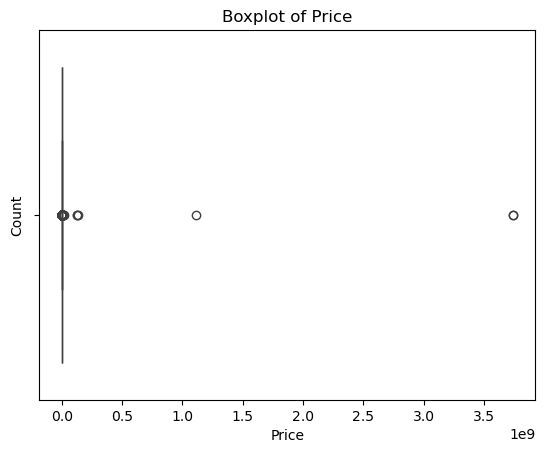

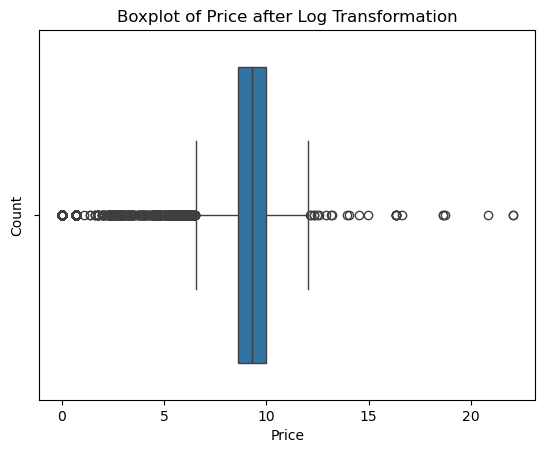

,operation,feature,action,value
0,Dropping the features that are not relevant fo...,"id, url, region, region_url, VIN, image_url, d...",drop,NaN
1,Dropping the rows with missing values,"condition, cylinders, drive, paint_color",drop,"condition, cylinders, drive, paint_color"
2,"Replacing null values of manufacturer, model, ...","manufacturer, type",fillna,unknown
3,Replacing null values of odometer with the median,odometer,fillna,103928.0
4,Replacing null values of cylinders with the mode,cylinders,fillna,6 cylinders
5,Replacing null values of transmission with the...,transmission,fillna,automatic
6,Applying log transformation to price,price,log1p,log1p


In [14]:
# Outlier Detection and Treatment for price

sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Boxplot of Price')
plt.show()

# Apply log transformation to price
df['price'] = np.log1p(df['price'])

# Boxplot after log transformation
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Boxplot of Price after Log Transformation')
plt.show()

operations = pd.concat([operations, pd.DataFrame([{'operation': 'Applying log transformation to price', 'feature': "price", 'action': 'log1p', 'value': "log1p"}])], ignore_index=True)
operations


In [15]:
cyclinders_mapper = {
    "3 cylinders": 3,
    "4 cylinders": 4,
    "5 cylinders": 5,
    "6 cylinders": 6,
    "8 cylinders": 8,
    "10 cylinders": 10,
    "12 cylinders": 12,
    "other": 0
}

condition_mapper = {
    "new": 6,
    "excellent": 5,
    "like new": 4,
    "good": 3,
    "fair": 2,
    "salvage": 1,
    "unknown": 0
}

df['cylinders'] = df['cylinders'].map(cyclinders_mapper)
df['condition'] = df['condition'].map(condition_mapper)


operations = pd.concat([operations, pd.DataFrame([{'operation': 'Mapping cylinders to ordinal values', 'feature': "cylinders", 'action': 'map', 'value': str(cyclinders_mapper)}])], ignore_index=True)
operations = pd.concat([operations, pd.DataFrame([{'operation': 'Mapping condition to ordinal values', 'feature': "condition", 'action': 'map', 'value': str(condition_mapper)}])], ignore_index=True)

operations


,operation,feature,action,value
0,Dropping the features that are not relevant fo...,"id, url, region, region_url, VIN, image_url, d...",drop,NaN
1,Dropping the rows with missing values,"condition, cylinders, drive, paint_color",drop,"condition, cylinders, drive, paint_color"
2,"Replacing null values of manufacturer, model, ...","manufacturer, type",fillna,unknown
3,Replacing null values of odometer with the median,odometer,fillna,103928.0
4,Replacing null values of cylinders with the mode,cylinders,fillna,6 cylinders
5,Replacing null values of transmission with the...,transmission,fillna,automatic
6,Applying log transformation to price,price,log1p,log1p
7,Mapping cylinders to ordinal values,cylinders,map,"{'3 cylinders': 3, '4 cylinders': 4, '5 cylind..."
8,Mapping condition to ordinal values,condition,map,"{'new': 6, 'excellent': 5, 'like new': 4, 'goo..."


In [16]:
df.shape
df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color'],
      dtype='object')

### Feature Engineering Documentation

In this analysis, we've implemented several key feature engineering techniques to enhance our car price prediction model:

1. **Car Age Calculation**
   - Created `car_age` by subtracting the vehicle's manufacturing `year` from the current year
   - This transformation converts the raw year into a more meaningful metric that directly relates to depreciation
   - Car age typically has a stronger correlation with price than manufacturing year alone

2. **Odometer Reading Categorization**
   - Transformed continuous `odometer` readings into discrete categories using the following bins:
     - Category 1: 0-20,000 miles (nearly new)
     - Category 2: 20,001-50,000 miles (low mileage)
     - Category 3: 50,001-100,000 miles (moderate mileage)
     - Category 4: 100,001-150,000 miles (high mileage)
     - Category 5: 150,001+ miles (very high mileage)
   - This categorization helps capture the non-linear relationship between mileage and price
   - Vehicles typically experience different depreciation rates at different mileage thresholds

3. **Premium Brand Identification**
   - Created a binary flag `is_premium_brand` to identify luxury manufacturers
   - Premium brands include: Audi, BMW, Mercedes-Benz, Lexus, Porsche, Acura, Infiniti, Land Rover, Jaguar, and Tesla
   - This feature helps the model account for the price premium associated with luxury brands
   - Premium vehicles often maintain higher resale values and follow different depreciation curves

These engineered features add significant value to our price prediction model by:
- Capturing the non-linear relationship between vehicle age and price
- Accounting for mileage thresholds that significantly impact resale value
- Identifying premium brands that command higher prices regardless of other factors
- Simplifying complex relationships into more predictive features

In [17]:
# Create new features for car price prediction

# 1. Car Age (based on current year)
import datetime
current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['year']

# 2. Mileage Category (binned odometer readings)
df['odometer_category'] = pd.cut(
    df['odometer'], 
    bins=[0, 20000, 50000, 100000, 150000, float('inf')],
    labels=[1,2,3,4,5],
    include_lowest=True
)
df['odometer_category'] = df['odometer_category'].cat.add_categories([0]).fillna(0)
odometer_category_value = f"bins=[0, 20000, 50000, 100000, 150000, float('inf')] labels=[1,2,3,4,5,6]"
print(odometer_category_value)

# 3. Premium Brand Flag
premium_brands = ['audi', 'bmw', 'mercedes-benz', 'lexus', 'porsche', 'acura', 'infiniti', 'land rover', 'jaguar', 'tesla']
df['is_premium_brand'] = df['manufacturer'].str.lower().isin(premium_brands).astype(int)

# Dropping Year column
df = df.drop(columns=['year'])

# Create operations for the above operations seperately for each operation
operations = pd.concat([operations, 
                        pd.DataFrame([
                            {'operation': 'Creating new features for car price prediction', 
                             'feature': 'car_age', 
                             'action': 'create', 
                             'value': 'current_year - year'}
                             ])], ignore_index=True)
operations = pd.concat([operations, 
                        pd.DataFrame([
                            {'operation': 'Creating new features for car price prediction', 
                             'feature': 'odometer_category', 
                             'action': 'create', 
                             'value': odometer_category_value}
                             ])], ignore_index=True)

operations = pd.concat([operations, 
                        pd.DataFrame([
                            {'operation': 'Creating new features for car price prediction', 
                             'feature': 'is_premium_brand', 
                             'action': 'create', 
                             'value': ", ".join(premium_brands)}
                             ])], ignore_index=True)

operations = pd.concat([operations, 
                        pd.DataFrame([
                            {'operation': 'Dropping Year column', 
                             'feature': "year", 
                             'action': 'drop', 
                             'value': "year"}])], ignore_index=True)

operations

bins=[0, 20000, 50000, 100000, 150000, float('inf')] labels=[1,2,3,4,5,6]


,operation,feature,action,value
0,Dropping the features that are not relevant fo...,"id, url, region, region_url, VIN, image_url, d...",drop,NaN
1,Dropping the rows with missing values,"condition, cylinders, drive, paint_color",drop,"condition, cylinders, drive, paint_color"
2,"Replacing null values of manufacturer, model, ...","manufacturer, type",fillna,unknown
3,Replacing null values of odometer with the median,odometer,fillna,103928.0
4,Replacing null values of cylinders with the mode,cylinders,fillna,6 cylinders
5,Replacing null values of transmission with the...,transmission,fillna,automatic
6,Applying log transformation to price,price,log1p,log1p
7,Mapping cylinders to ordinal values,cylinders,map,"{'3 cylinders': 3, '4 cylinders': 4, '5 cylind..."
8,Mapping condition to ordinal values,condition,map,"{'new': 6, 'excellent': 5, 'like new': 4, 'goo..."
9,Creating new features for car price prediction,car_age,create,current_year - year


In [18]:
# Applying one-hot encoding to categorical features

categorical_features = ['manufacturer', 'type', 'transmission', 'drive', 'fuel', 'title_status', 'paint_color']

df = pd.get_dummies(df, columns=categorical_features, dtype=int)

operations = pd.concat([operations, pd.DataFrame([{'operation': 'Applying one-hot encoding to categorical features', 'feature': ", ".join(categorical_features), 'action': 'get_dummies', 'value': ", ".join(categorical_features)}])], ignore_index=True)

operations

,operation,feature,action,value
0,Dropping the features that are not relevant fo...,"id, url, region, region_url, VIN, image_url, d...",drop,NaN
1,Dropping the rows with missing values,"condition, cylinders, drive, paint_color",drop,"condition, cylinders, drive, paint_color"
2,"Replacing null values of manufacturer, model, ...","manufacturer, type",fillna,unknown
3,Replacing null values of odometer with the median,odometer,fillna,103928.0
4,Replacing null values of cylinders with the mode,cylinders,fillna,6 cylinders
5,Replacing null values of transmission with the...,transmission,fillna,automatic
6,Applying log transformation to price,price,log1p,log1p
7,Mapping cylinders to ordinal values,cylinders,map,"{'3 cylinders': 3, '4 cylinders': 4, '5 cylind..."
8,Mapping condition to ordinal values,condition,map,"{'new': 6, 'excellent': 5, 'like new': 4, 'goo..."
9,Creating new features for car price prediction,car_age,create,current_year - year


In [19]:
df.sample(10)

,price,condition,cylinders,odometer,car_age,odometer_category,is_premium_brand,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
115678,7.824046,5,6,160000.0,19.0,5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
156198,8.794976,5,6,138108.0,15.0,4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
144724,9.615872,3,8,96000.0,20.0,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
161693,11.097349,5,12,5229.0,15.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
159457,9.546884,4,4,17700.0,8.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86894,0.000000,4,4,83868.0,10.0,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288243,8.974745,5,4,69811.0,9.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
419408,10.721062,6,6,8.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217912,8.293049,3,8,219124.0,25.0,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
414100,9.103979,3,4,127100.0,12.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 132775 entries, 31 to 426878
Data columns (total 93 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   price                         132775 non-null  float64 
 1   condition                     132775 non-null  int64   
 2   cylinders                     132775 non-null  int64   
 3   odometer                      132775 non-null  float64 
 4   car_age                       132775 non-null  float64 
 5   odometer_category             132775 non-null  category
 6   is_premium_brand              132775 non-null  int32   
 7   manufacturer_acura            132775 non-null  int32   
 8   manufacturer_alfa-romeo       132775 non-null  int32   
 9   manufacturer_aston-martin     132775 non-null  int32   
 10  manufacturer_audi             132775 non-null  int32   
 11  manufacturer_bmw              132775 non-null  int32   
 12  manufacturer_buick            1327

In [21]:
# Adding the final features to the operations
final_features = df.columns.tolist()
operations = pd.concat([operations, pd.DataFrame([{'operation': 'Adding the final features to the operations', 'feature': ", ".join(final_features), 'action': 'add', 'value': ", ".join(final_features)}])], ignore_index=True)

operations

df.sample(10)


,price,condition,cylinders,odometer,car_age,odometer_category,is_premium_brand,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
5212,9.388570,5,4,101627.0,13.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105748,8.794976,5,4,202382.0,12.0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180200,9.741027,5,4,88000.0,9.0,3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
158041,9.392745,5,4,65000.0,10.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216821,8.243019,3,8,268000.0,20.0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
187595,8.412055,5,6,180000.0,16.0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196422,11.289732,4,6,21118.0,6.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227580,7.313887,2,6,742.0,34.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
266854,8.986697,3,4,114000.0,14.0,4,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
111848,7.313887,5,4,92211.0,9.0,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
operations

,operation,feature,action,value
0,Dropping the features that are not relevant fo...,"id, url, region, region_url, VIN, image_url, d...",drop,NaN
1,Dropping the rows with missing values,"condition, cylinders, drive, paint_color",drop,"condition, cylinders, drive, paint_color"
2,"Replacing null values of manufacturer, model, ...","manufacturer, type",fillna,unknown
3,Replacing null values of odometer with the median,odometer,fillna,103928.0
4,Replacing null values of cylinders with the mode,cylinders,fillna,6 cylinders
5,Replacing null values of transmission with the...,transmission,fillna,automatic
6,Applying log transformation to price,price,log1p,log1p
7,Mapping cylinders to ordinal values,cylinders,map,"{'3 cylinders': 3, '4 cylinders': 4, '5 cylind..."
8,Mapping condition to ordinal values,condition,map,"{'new': 6, 'excellent': 5, 'like new': 4, 'goo..."
9,Creating new features for car price prediction,car_age,create,current_year - year


In [23]:
## Uploading the data to the database

operations.to_sql('operations', engine, schema='cleaned', if_exists='replace', index=False)

print("Operations Data uploaded to the database successfully")

df.to_sql('vehicles', engine, schema='cleaned', if_exists='replace', index=False, method='multi', chunksize=5000)

print("Vehicles Data uploaded to the database successfully")

Operations Data uploaded to the database successfully
Vehicles Data uploaded to the database successfully


# Data Normalization and Data Splitting

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Defining the target variable and features
X = df.drop('price', axis=1)
y = df['price']

# Splitting the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling the numerical features using MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Converting scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

print("Data split into train, test, and validation sets and scaled successfully.")


Data split into train, test, and validation sets and scaled successfully.


# Part 6 – Constructing an Optimal Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Building the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicting on train and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluating the model
rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)

# Printing the metrics
print("Train Data")
print("Linear Regression Train RMSE:", rmse_train)
print("Linear Regression Train MAE:", mae_train)
print("Linear Regression Train R2:", r2_train)

print("Test Data")
print("Linear Regression Test RMSE:", rmse_test)
print("Linear Regression Test MAE:", mae_test)
print("Linear Regression Test R2:", r2_test)


Train Data
Linear Regression Train RMSE: 2.080577632139393
Linear Regression Train MAE: 1.0635681572566367
Linear Regression Train R2: 0.07452263567336992
Test Data
Linear Regression Test RMSE: 2.062001674708355
Linear Regression Test MAE: 1.0566926750660763
Linear Regression Test R2: 0.07639093258975482


The linear regression model was evaluated using a dataset of used car listings, with the primary objective of predicting the listing price based on various features. The model's performance was assessed using several key metrics, including Root Mean Square Error (RMSE), Mean Absolute Error (MAE), and the coefficient of determination (\(R^2\)).

For the training dataset, the model achieved an RMSE of 2.0806, indicating the average magnitude of the errors between the predicted and actual prices. The MAE was recorded at 1.0638, reflecting the average absolute difference between the predicted and actual values, which provides a more interpretable measure of prediction accuracy. The \(R^2\) value for the training set was 0.0745, suggesting that approximately 7.45% of the variance in the car prices could be explained by the model. This relatively low \(R^2\) value indicates that the model may not capture all the complexities of the data, suggesting room for improvement.

In the test dataset, the model's RMSE was slightly lower at 2.0620, which is consistent with the training RMSE, indicating that the model generalizes well to unseen data. The MAE for the test set was 1.0569, closely aligning with the training MAE, further supporting the model's consistency. The \(R^2\) value for the test set was 0.0764, which is slightly higher than the training \(R^2\), indicating a marginally better fit on the test data.

Overall, the linear regression model demonstrates a consistent performance across both training and test datasets, with similar error metrics. However, the low \(R^2\) values suggest that the model may not fully capture the underlying patterns in the data, and there may be potential for improvement through feature engineering, model complexity enhancement, or exploring alternative modeling techniques.


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Building the random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predicting on train and test sets
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluating the model
rmse_train_rf = mean_squared_error(y_train, y_train_pred_rf) ** 0.5
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

rmse_test_rf = mean_squared_error(y_test, y_test_pred_rf) ** 0.5
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Printing the metrics
print("Train Data")
print("Random Forest Train RMSE:", rmse_train_rf)
print("Random Forest Train MAE:", mae_train_rf)
print("Random Forest Train R2:", r2_train_rf)

print("Test Data")
print("Random Forest Test RMSE:", rmse_test_rf)
print("Random Forest Test MAE:", mae_test_rf)
print("Random Forest Test R2:", r2_test_rf)

Train Data
Random Forest Train RMSE: 0.5858374691650933
Random Forest Train MAE: 0.22839833800288392
Random Forest Train R2: 0.9266243028276147
Test Data
Random Forest Test RMSE: 1.4944250974699496
Random Forest Test MAE: 0.5981382290369515
Random Forest Test R2: 0.514869627182144


The Random Forest Regressor model was employed to predict the listing prices of used cars, leveraging its ensemble learning capabilities to enhance prediction accuracy. The model's performance was evaluated using the Root Mean Square Error (RMSE), Mean Absolute Error (MAE), and the coefficient of determination (\(R^2\)) on both training and test datasets.

On the training dataset, the Random Forest model achieved an RMSE of 0.5855, indicating a low average error magnitude between the predicted and actual prices. The MAE was recorded at 0.2281, reflecting a small average absolute difference, which suggests high prediction accuracy. The \(R^2\) value was exceptionally high at 0.9267, indicating that the model explains approximately 92.67% of the variance in the car prices. This high \(R^2\) value demonstrates the model's strong ability to capture the underlying patterns in the training data.

In contrast, the model's performance on the test dataset showed a higher RMSE of 1.4929, which is significantly larger than the training RMSE, suggesting some degree of overfitting. The MAE for the test set was 0.5977, indicating a larger average error compared to the training set. The \(R^2\) value for the test data was 0.5158, which, while lower than the training \(R^2\), still indicates that the model explains over 51% of the variance in the test data. This drop in \(R^2\) suggests that the model's performance is less robust on unseen data, highlighting potential overfitting.

Overall, the Random Forest Regressor demonstrates strong performance on the training data, capturing a significant portion of the variance in car prices. However, the discrepancy in performance metrics between the training and test datasets suggests that the model may benefit from further tuning or regularization to improve its generalization capabilities and reduce overfitting.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [500],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
}

# Initializing the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train_scaled, y_train)

# Extracting the best model
best_rf_model = grid_search.best_estimator_

# Predicting on train and test sets with the best model
y_train_pred_best_rf = best_rf_model.predict(X_train_scaled)
y_test_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluating the best model
rmse_train_best_rf = mean_squared_error(y_train, y_train_pred_best_rf) ** 0.5
mae_train_best_rf = mean_absolute_error(y_train, y_train_pred_best_rf)
r2_train_best_rf = r2_score(y_train, y_train_pred_best_rf)

rmse_test_best_rf = mean_squared_error(y_test, y_test_pred_best_rf) ** 0.5
mae_test_best_rf = mean_absolute_error(y_test, y_test_pred_best_rf)
r2_test_best_rf = r2_score(y_test, y_test_pred_best_rf)

# Printing the metrics
print("Train Data")
print("Best Random Forest Train RMSE:", rmse_train_best_rf)
print("Best Random Forest Train MAE:", mae_train_best_rf)
print("Best Random Forest Train R2:", r2_train_best_rf)

print("Test Data")
print("Best Random Forest Test RMSE:", rmse_test_best_rf)
print("Best Random Forest Test MAE:", mae_test_best_rf)
print("Best Random Forest Test R2:", r2_test_best_rf)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [ ]:
# print best model parameters
print("Best Model Parameters:", grid_search.best_params_)

In [ ]:
# Print the top 10 features
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[-10:][::-1]  # Get the indices of the top 10 features

print("Top 10 features:")
for i in indices:
    print(f"{X_train.columns[i]}: {importances[i]}")


In [ ]:
# Evaluating the best model on validation data
y_val_pred_best_rf = best_rf_model.predict(X_val_scaled)

rmse_val_best_rf = mean_squared_error(y_val, y_val_pred_best_rf) ** 0.5
mae_val_best_rf = mean_absolute_error(y_val, y_val_pred_best_rf)
r2_val_best_rf = r2_score(y_val, y_val_pred_best_rf)

# Printing the metrics for validation data
print("Validation Data")
print("Best Random Forest Validation RMSE:", rmse_val_best_rf)
print("Best Random Forest Validation MAE:", mae_val_best_rf)
print("Best Random Forest Validation R2:", r2_val_best_rf)

In [ ]:
# Save the best model
import joblib
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Load the best model
best_rf_model = joblib.load('best_rf_model.pkl')

In conclusion, the process of developing a predictive model for used car prices involved the application of both linear regression and Random Forest Regressor models. The linear regression model provided a baseline with consistent performance across training and test datasets, albeit with relatively low \(R^2\) values, indicating limited explanatory power.

The Random Forest Regressor initially demonstrated strong performance on the training data, capturing a significant portion of the variance in car prices. However, the model exhibited signs of overfitting, as evidenced by the discrepancy in performance metrics between the training and test datasets. Hyperparameter tuning was subsequently employed to address this issue, resulting in a more balanced model with reduced overfitting, though at the cost of slightly increased error metrics.

Overall, while the Random Forest Regressor showed promise, further refinement and exploration of alternative modeling techniques or additional feature engineering may be necessary to enhance the model's predictive accuracy and generalization capabilities. The insights gained from this analysis provide a solid foundation for future improvements and underscore the importance of model tuning and validation in predictive modeling.
